# Базовая оптимизация

> В базовой оптимизации, предоставляемой библиотекой sklearn, есть два основных метода — **grid search** и **random search**. С ними мы сейчас и познакомимся. Оба используются при решении реальных задач, поэтому важно разобраться, как они устроены. 

Наиболее часто используемый метод — это **поиск по сетке** (*grid search*), который по сути является попыткой перебрать все возможные комбинации заданных гиперпараметров. Мы указываем список значений для различных гиперпараметров, и, ориентируясь на нашу метрику, оцениваем эффективность модели для каждого их сочетания, чтобы получить оптимальную комбинацию значений.

Допустим, мы хотим подобрать гиперпараметры *min_samples_leaf* и *max_depth* для алгоритма *DecisionTreeClassifier*. Зададим списки их значений:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [ ]:
min_samples_leaf = [3, 5, 8, 9]
max_depth = [4, 5, 6, 7, 8]

Поскольку нам нужно перебрать четыре различных значения для *min_samples_leaf* и пять — для *max_depth*, то получается всего 4*5=20 комбинаций. Модель будет обучена 20 раз; столько же раз будет рассчитана метрика.

Сетка выглядит следующим образом:

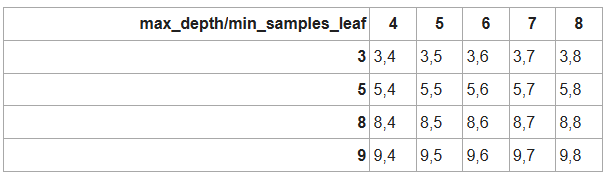

### Задание 2.1

Сколько раз придется обучить модель, если мы хотим подобрать гиперпараметры min_samples_leaf, max_depth, criterion со следующими списками значений:

min_samples_leaf = [7, 8, 9]
max_depth = [2, 7, 8, 10]
criterion = ['gini', 'entropy']

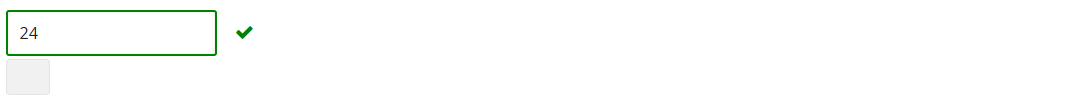

## Опасность переобучения и утечки данных

Для того, чтобы выбрать оптимальные значения гиперпараметров, мы ориентируемся на выбранную метрику, рассчитанную на тестовой выборке. Мы делали это для подбора гиперпараметра регуляризации alpha, но является ли это надёжным подходом?

> Эту проблему мы уже обсуждали в модуле ML-5 «Валидация и оценка качества моделей».

Давайте вспомним: мы перебираем множество значений гиперпараметров и выбираем ту комбинацию значений, которая даёт наилучшую точность на тестовых данных. Однако это **совсем не означает, что на новых данных мы получим такой же результат.** 

Поскольку мы использовали тестовый набор для настройки гиперпараметров, мы больше не можем использовать его для оценки качества модели. Теперь в этих целях нам необходим независимый набор данных, то есть набор, который не использовался для построения модели и настройки её гиперпараметров.

Следовательно, надо разбить данные на **три части: обучающую** для построения модели, проверочную (**валидационную**) для выбора гиперпараметров модели, а также **тестовую** для оценки качества модели и выбранных гиперпараметров

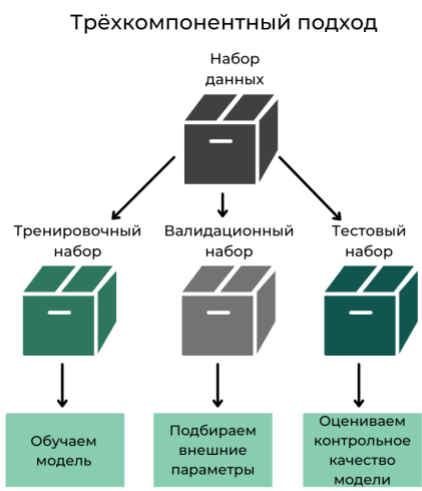

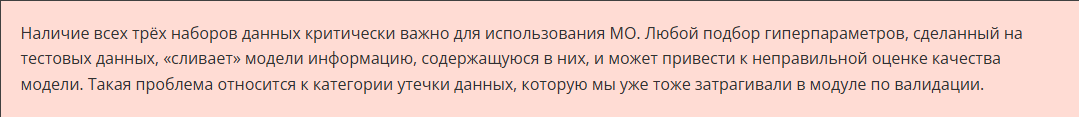

### Задание 2.2

Для чего необходима проверочная (валидационная) выборка?

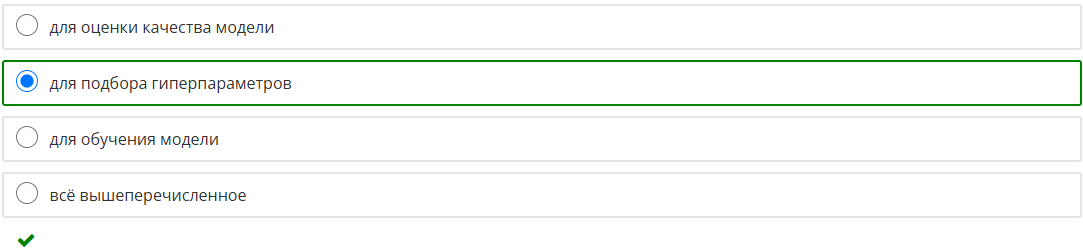

 > Рассмотренный метод разбиения данных на обучающий, проверочный и тестовый наборы является вполне рабочим и относительно широко используемым, но весьма чувствителен к равномерности разбиения данных. 

 Для лучшей оценки обобщающей способности вместо одного разбиения данных на обучающий и проверочный наборы мы можем воспользоваться перекрёстной проверкой, то есть кросс-валидацией (cross validation). В таком случае качество модели оценивается для каждой комбинации гиперпараметров по всем разбиениям кросс-валидации. 

 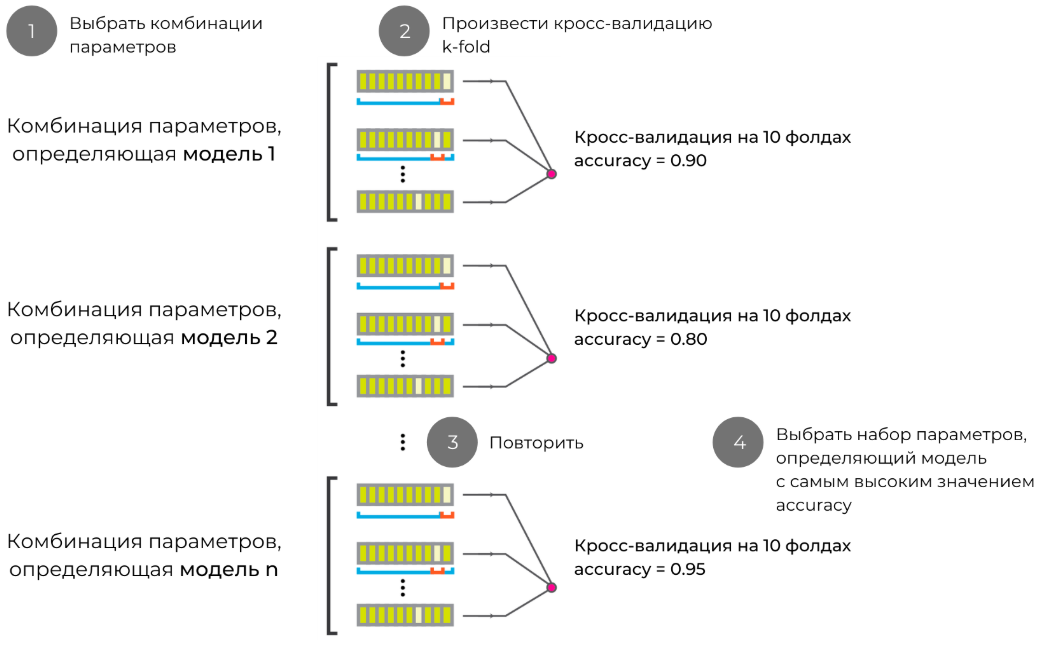

> Пояснение к рисунку. Предположим, что у нас есть n комбинаций гиперпараметров. Берём первую комбинацию и обучаем на них первую модель с помощью кросс-валидации с 10 фолдами (cv=10), затем рассчитываем метрику как среднее по всем разбиениям. Так проделываем для каждой комбинации и выбираем ту, при которой наша метрика наилучшая. В итоге мы обучим n*cv моделей, но выберем один набор гиперпараметров, который и будет использоваться для обучения итоговой модели на всей обучающей выборке.

## GridSearchCV

Поскольку поиск по сетке с кросс-валидацией является весьма распространённым методом настройки гиперпараметров, библиотека scikit-learn предлагает класс **GridSearchCV**, в котором осуществляется именно такой вариант.

Для этого продолжим решать задачу классификации из модуля ML-3 «Предсказываем категорию дохода человека», где вы изучали алгоритмы МО, а теперь проделаем оптимизацию гиперпараметров для каждого из них

## Рекомендации по настройке гиперпараметров ансамблей над решающими деревьями

### Алгоритм случайного леса (RandomForest)

- **n_estimators** — число итераций (количество деревьев). Частично работает правило «чем больше, тем лучше», но иногда это не имеет особого смысла и сильно увеличивает затраты, поэтому стоит пробовать обучать сотни деревьев [100,200, 300, 400]. Если нет изменений, то оставить минимальное — 100.

- **max_depth** — максимальная глубина дерева. В случайном лесе строятся «сильные» деревья, каждое из которых даёт полноценный прогноз, поэтому глубина деревьем может быть достаточно большой. Стоит следить за переобучением.

- **max_features** — максимальное количество признаков, учитываемых алгоритмом при поиске лучшего разделения;

- **max_samples** — доля выборки, которая будет использоваться для обучения каждого алгоритма — дерева.

> Примечание. Так как алгоритм градиентного бустинга мы ещё не проходили, вы можете вернуться в данный раздел, когда изучите модуль ML-8.

### Алгоритм градиентного бустинга (GradientBoosting)

**n_estimators** — число итераций (количество деревьев) : хотя ошибка на обучении монотонно стремится к нулю, ошибка на контроле, как правило, начинает увеличиваться после определенной итерации. Оптимальное число итераций можно выбирать, например, по отложенной выборке или с помощью кросс-валидации.

**learning_rate** — темп обучения (0;1]:

На практике оказывается, что градиентный бустинг очень быстро строит композицию, ошибка которой на обучении выходит на асимптоту (достигает предела), после чего начинает настраиваться на шум и переобучаться. Параметр learning_rate контролирует, насколько сильно каждое дерево будет пытаться исправить ошибки предыдущих деревьев. Более высокая скорость обучения означает, что каждое дерево может внести более сильные корректировки. Как правило, чем меньше темп обучения, тем лучше качество итоговой композиции.

**max_depth** — максимальная глубина дерева. Используется для борьбы с переобучением. Рекомендуется устанавливать не более 5.

**max_features** — максимальное количество признаков, учитываемых алгоритмом при поиске лучшего разделения.

**subsample** — доля выборки, которая будет использоваться для обучения каждого алгоритма. Это ещё один способ улучшения качества градиентного бустинга. Таким образом вносится 
рандомизация в процесс обучения базовых алгоритмов, что снижает уровень шума в обучении, а также повышает эффективность вычислений.

> **Рекомендация**. Берите подвыборки, размер которых вдвое меньше исходной выборки.

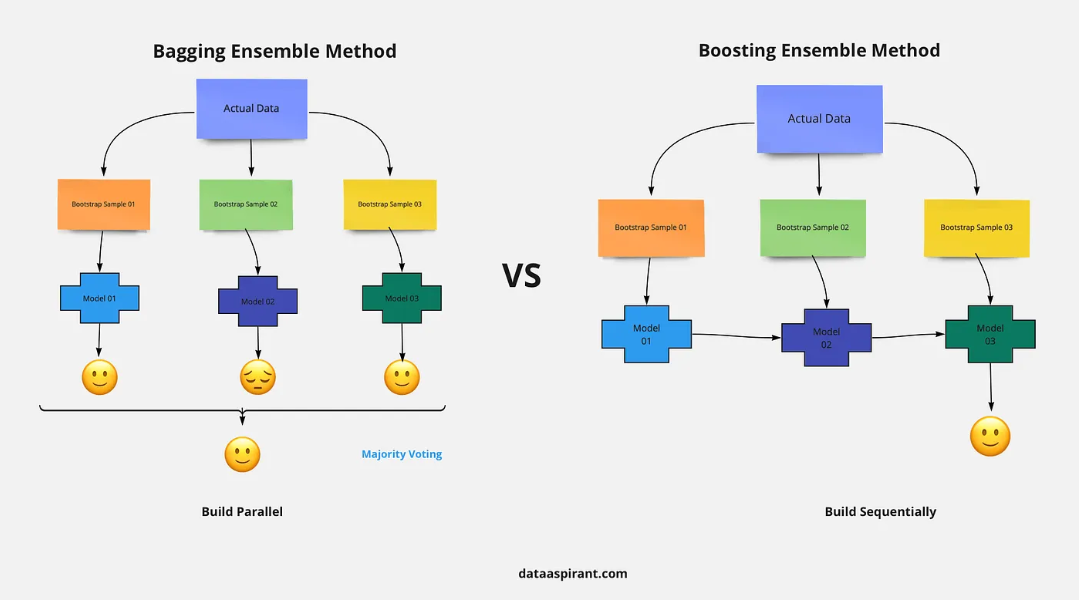

Главное отличие техник *Bagging* и *Boosting* состоит в параллельном и последовательном построении деревьев соответственно.

Основные параметры градиентного бустинга деревьев — это количество деревьев (**n_estimators**) и скорость обучения (**learning_rate**), контролирующие степень вклада каждого дерева в устранение ошибок предыдущих деревьев. Эти два параметра тесно взаимосвязаны, поскольку более низкое значение **learning_rate** означает, что для построения модели аналогичной сложности необходимо большее количество деревьев.

> **В отличие от случайного леса, в котором более высокое значение n_estimators всегда дает лучшее качество, увеличение значения n_estimators в градиентном бустинге даёт более сложную модель, что может привести к переобучению. При всём этом случайный лес, в отличие от градиентного бустинга, использует глубокие деревья, способные сформировать полноценный прогноз.**

Общепринятая практика для бустинга — подгонять n_estimators в зависимости от бюджета времени и памяти, а затем подбирать различные значения learning_rate.

> Подробнее о градиентном бустинге можно почитать по [ссылке.](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) 


### Задание 2.12

Для какого алгоритма большее значение n_estimators будет плюсом?

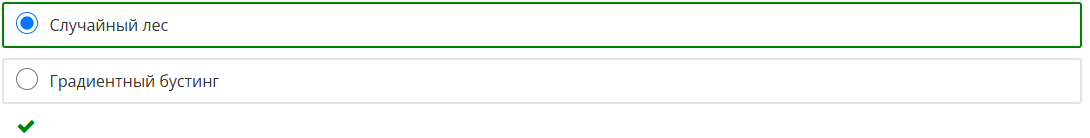

### Задание 2.13

В каком случае деревья строятся параллельно, независимо друг от друга?

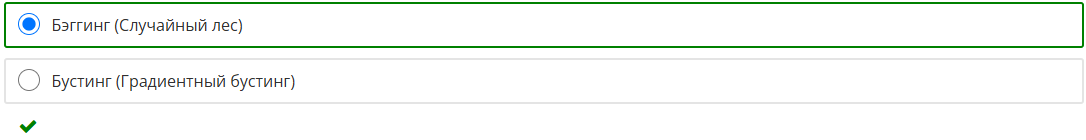

### Задание 2.14

Какой гиперпараметр отвечает за скорость обучения в градиентном бустинге?

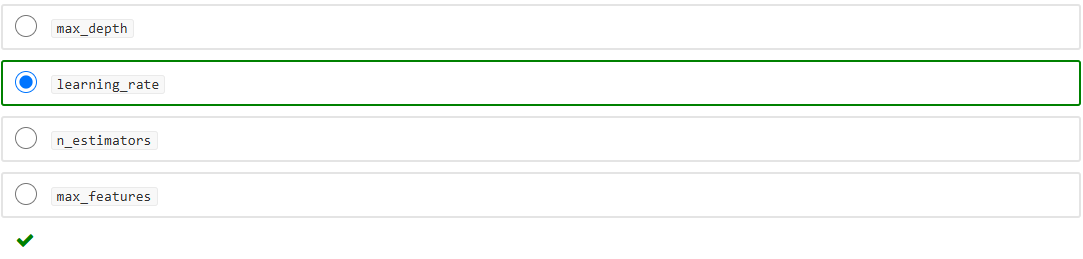

### Задание 2.15

Для какого алгоритма гиперпараметр max_depth рекомендуется брать небольшим?

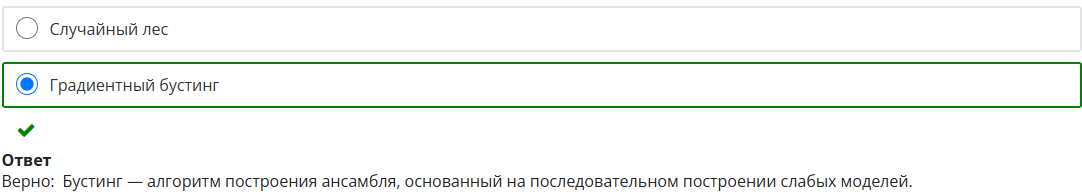